In [267]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

In [268]:
#1a
#Load breast cancer dataset and perform train-test split
data = sklearn.datasets.load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [269]:
#1b
#View given description of dataset and summary statistics of features
print(data['DESCR'])
X_train.describe()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.141158,19.414286,92.017956,656.424176,0.096186,0.102984,0.086939,0.048332,0.180699,0.062539,...,16.267563,25.841912,107.213736,879.263736,0.131884,0.249245,0.265771,0.112978,0.289185,0.083105
std,3.544258,4.337580,24.466388,351.722055,0.013973,0.053186,0.079922,0.039000,0.027634,0.006895,...,4.818821,6.194444,33.676294,562.954532,0.022156,0.157377,0.209304,0.066238,0.062073,0.017720
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.335000,75.100000,420.300000,0.086025,0.063185,0.028680,0.020240,0.161750,0.057510,...,13.040000,21.325000,84.075000,515.850000,0.116900,0.143600,0.109000,0.063635,0.247750,0.071250
50%,13.280000,18.900000,86.180000,545.200000,0.095940,0.091590,0.058920,0.032750,0.177900,0.061440,...,14.970000,25.470000,97.650000,684.600000,0.131200,0.211300,0.215100,0.097830,0.281000,0.079440
75%,16.130000,21.815000,106.000000,804.100000,0.105000,0.129150,0.126900,0.070140,0.195500,0.065890,...,19.125000,30.080000,127.000000,1111.500000,0.144750,0.317150,0.375700,0.158900,0.316550,0.090895
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9787aac50>,
      dtype=object)

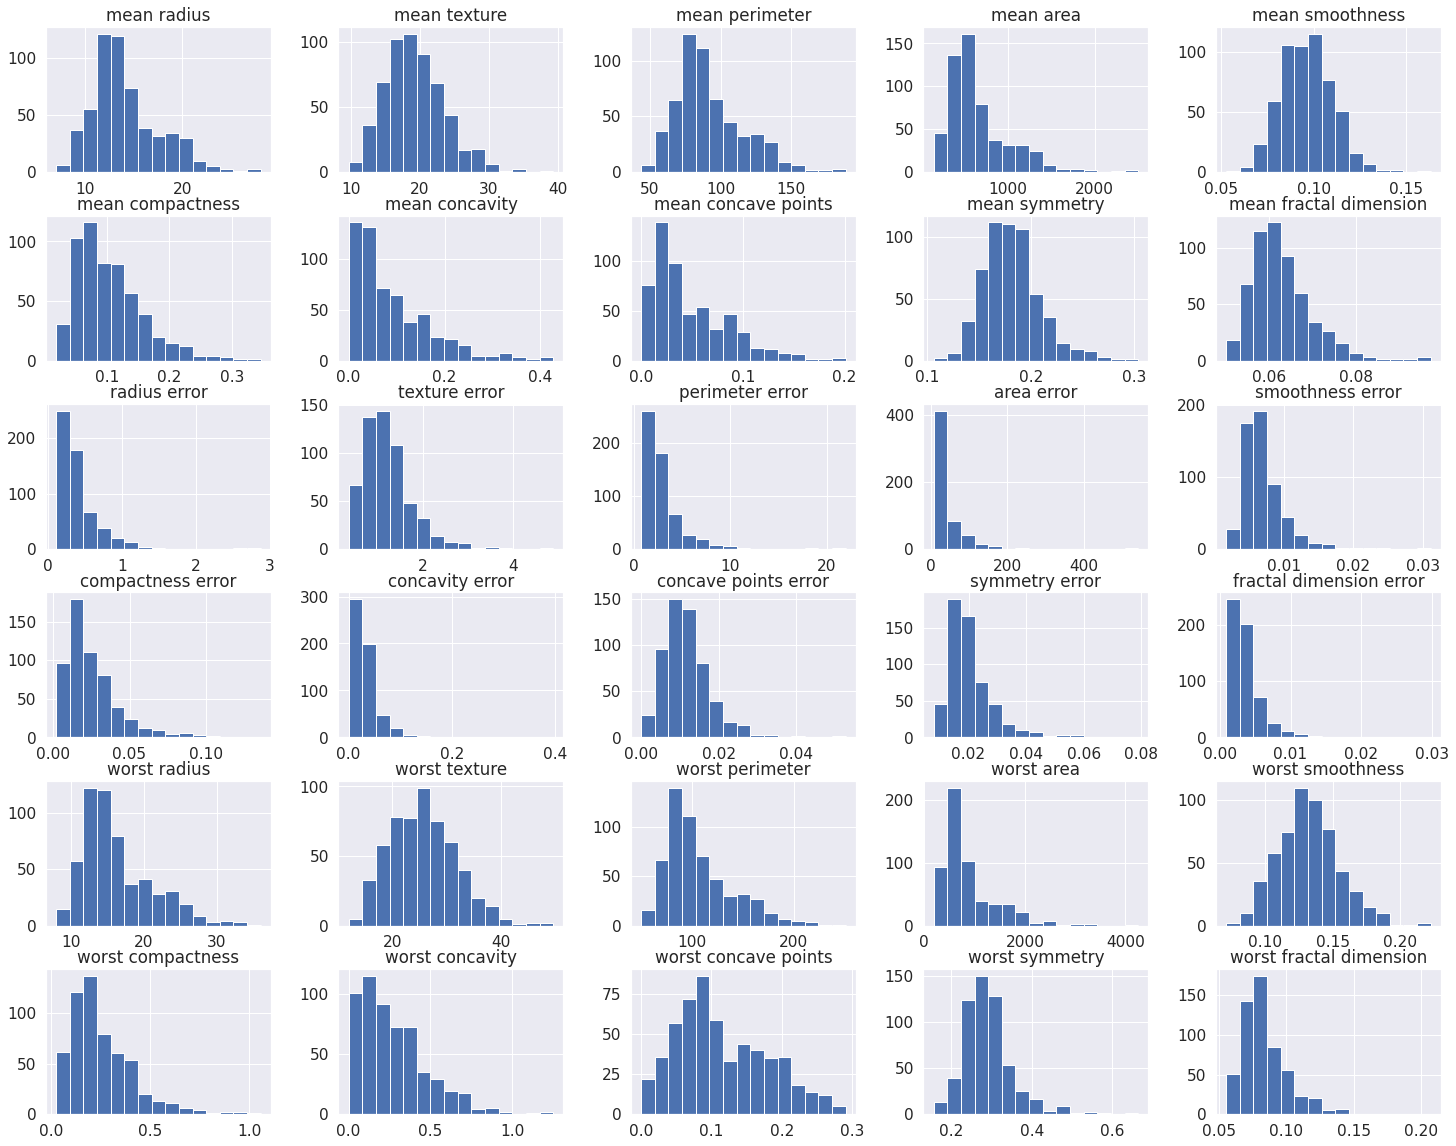

In [270]:
#1b cont.
#View distribution of features
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
data['data'].hist(bins=15, figsize=(25, 20), layout=(6, 5))

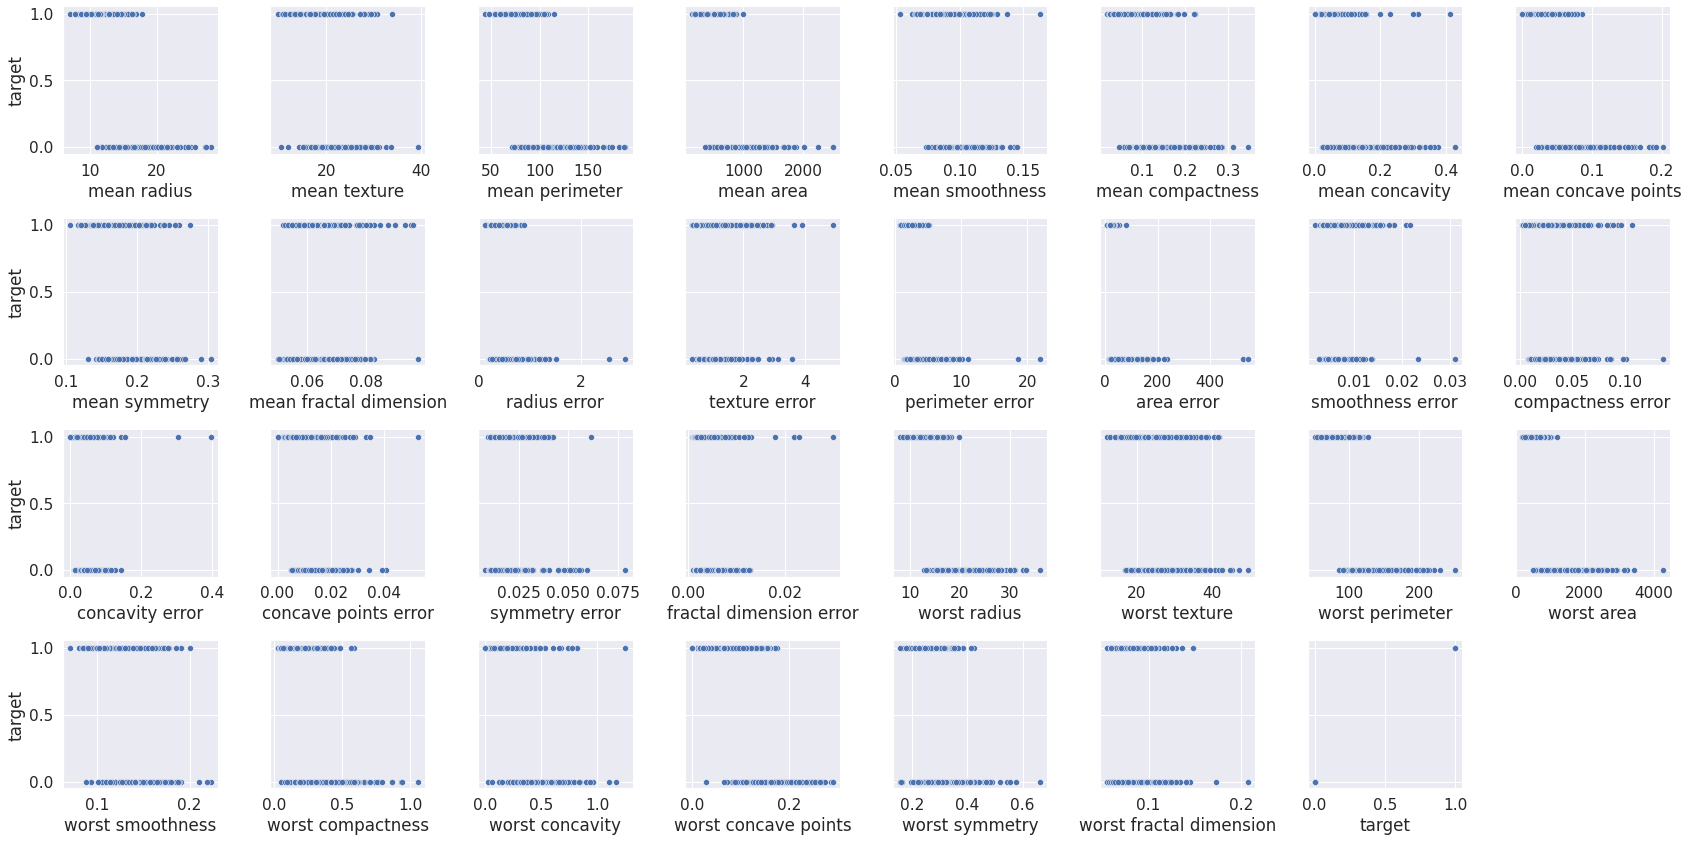

In [271]:
#1b cont.
#View feature values based on corresponding target value
x_vars = df.columns
y_var = "target"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=8, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=df, x=x_var, y=y_var, ax=ax)
g.tight_layout()

Confusion matrix:
[[39  3]
 [ 0 72]]


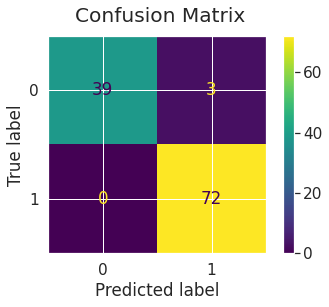

In [272]:
#1c
#Make a binary classification using a ridge classifier, which classifies tumors based on ridge regression, which is ordinary least squares with l2 regularization to penalize the size of coefficients
#Use all default hyperparameters, no particular benefit to changing them
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

#Plot confusion matrix
#0 represents malignant tumor, and 1 represents benign tumor
CM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

Accuracy: 0.9736842105263158
Precision score: 1.0
Recall score: 0.96
Cross-validation accuracy: 0.9542919799498746
Cross-validation standard deviation: 0.02508553545336143


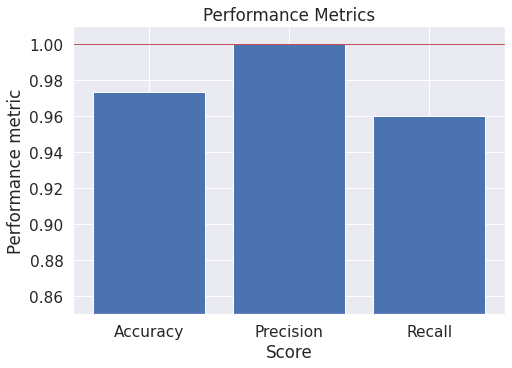

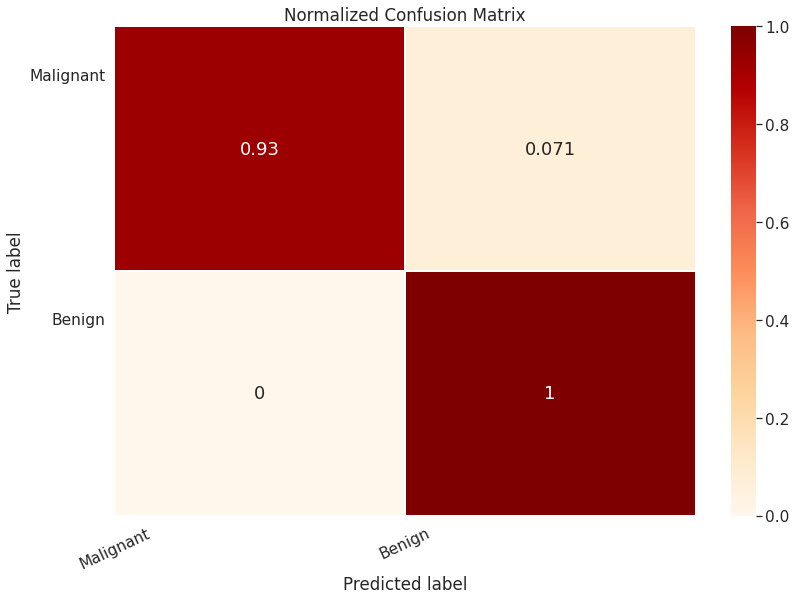

In [273]:
#1d
#Accuracy, precision, and recall
print("Accuracy: " + str(accuracy_score(y_pred ,y_test)))
print("Precision score: " + str(precision_score(y_pred, y_test)))
print("Recall score: " + str(recall_score(y_pred, y_test)))

#Cross-validation score based on 10 folds; my primary "goodness" metric
scores = cross_val_score(ridge, X, y, cv=10)
print("Cross-validation accuracy: " + str(scores.mean()))
print("Cross-validation standard deviation: " + str(scores.std()))

#Plot of accuracy, precision, recall
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy_score(y_pred ,y_test),precision_score(y_pred ,y_test),recall_score(y_pred ,y_test)]
ax.bar(metrics,scores)
plt.ylim([0.85,1.01])
plt.axhline(y=1,linewidth=1, color='r')
plt.xlabel('Score')
plt.ylabel('Performance metric')
plt.title('Performance Metrics')
plt.show()

#Plot of normalized confusion matrix for better sense of errors
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(13,9))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':18},
            cmap=plt.cm.OrRd, linewidths=0.2)

class_names = ['Malignant', 'Benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.2
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

Confusion matrix:
[[37  5]
 [ 2 70]]
Accuracy: 0.9385964912280702
Precision score: 0.9722222222222222
Recall score: 0.9333333333333333
Cross-validation accuracy: 0.9315162907268169
Cross-validation standard deviation: 0.03454199903815862


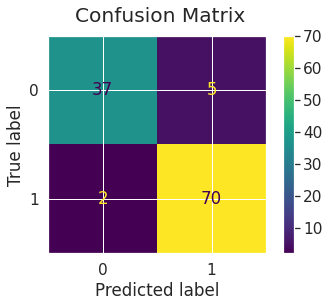

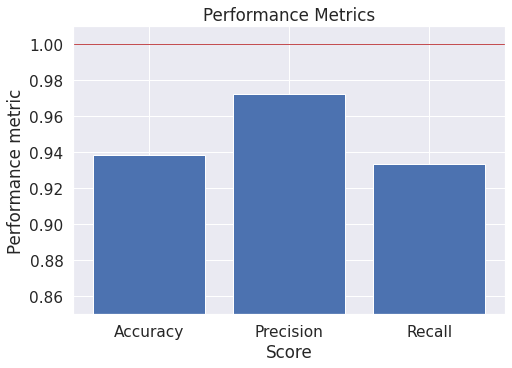

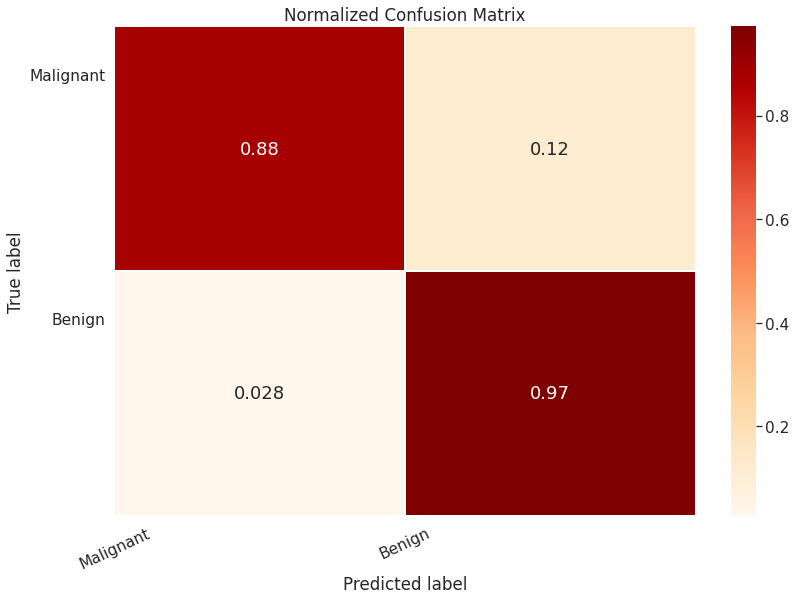

In [274]:
#1e(i)
#K-nearest neighbour classification with confusion matrix and same metrics as before
#Increased number of nearest neighbours to consider to 10 to provide better fit without overfitting, other default hyperparameters are suitable
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

CM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

print("Accuracy: " + str(accuracy_score(y_pred,y_test)))
print("Precision score: " + str(precision_score(y_pred,y_test)))
print("Recall score: " + str(recall_score(y_pred,y_test)))
scores = cross_val_score(knn, X, y, cv=10)
print("Cross-validation accuracy: " + str(scores.mean()))
print("Cross-validation standard deviation: " + str(scores.std()))

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy_score(y_pred ,y_test),precision_score(y_pred ,y_test),recall_score(y_pred ,y_test)]
ax.bar(metrics,scores)
plt.ylim([0.85,1.01])
plt.axhline(y=1,linewidth=1, color='r')
plt.xlabel('Score')
plt.ylabel('Performance metric')
plt.title('Performance Metrics')
plt.show()

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(13,9))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':18},
            cmap=plt.cm.OrRd, linewidths=0.2)

class_names = ['Malignant', 'Benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.2
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

Confusion matrix:
[[40  2]
 [ 2 70]]
Accuracy: 0.9649122807017544
Precision score: 0.9722222222222222
Recall score: 0.9722222222222222
Cross-validation accuracy: 0.9367794486215537
Cross-validation standard deviation: 0.02844425208918023


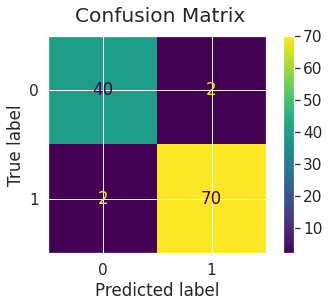

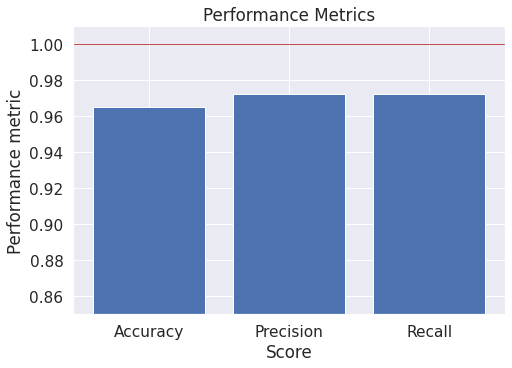

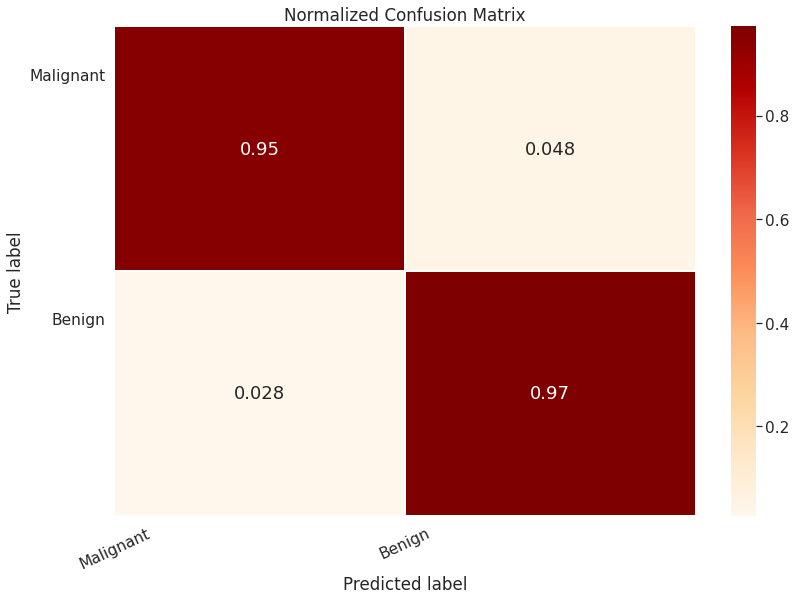

In [275]:
#1e(ii)
#Naive bayes classification with confusion matrix and same metrics as before
#Chose Gaussian naive bayes because feature values are continuous
#Hyperparameters as default, no apparent benefit to changing them
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

CM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

print("Accuracy: " + str(accuracy_score(y_pred,y_test)))
print("Precision score: " + str(precision_score(y_pred,y_test)))
print("Recall score: " + str(recall_score(y_pred,y_test)))
scores = cross_val_score(gnb, X, y, cv=10)
print("Cross-validation accuracy: " + str(scores.mean()))
print("Cross-validation standard deviation: " + str(scores.std()))

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy_score(y_pred ,y_test),precision_score(y_pred ,y_test),recall_score(y_pred ,y_test)]
ax.bar(metrics,scores)
plt.ylim([0.85,1.01])
plt.axhline(y=1,linewidth=1, color='r')
plt.xlabel('Score')
plt.ylabel('Performance metric')
plt.title('Performance Metrics')
plt.show()

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(13,9))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':18},
            cmap=plt.cm.OrRd, linewidths=0.2)

class_names = ['Malignant', 'Benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.2
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

Confusion matrix:
[[39  3]
 [ 5 67]]
Accuracy: 0.9298245614035088
Precision score: 0.9305555555555556
Recall score: 0.9571428571428572
Cross-validation accuracy: 0.9543233082706767
Cross-validation standard deviation: 0.023770661464399972


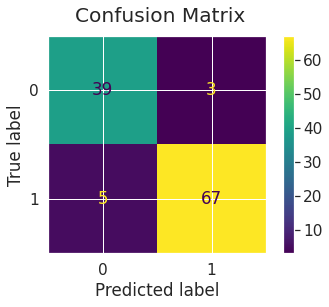

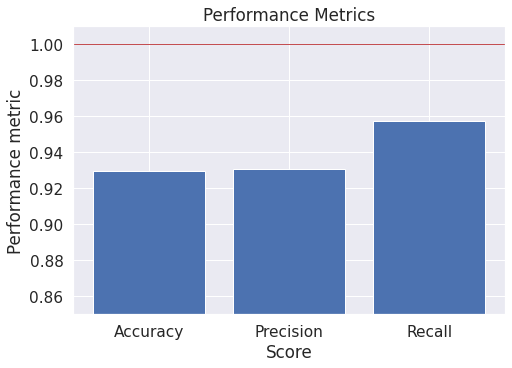

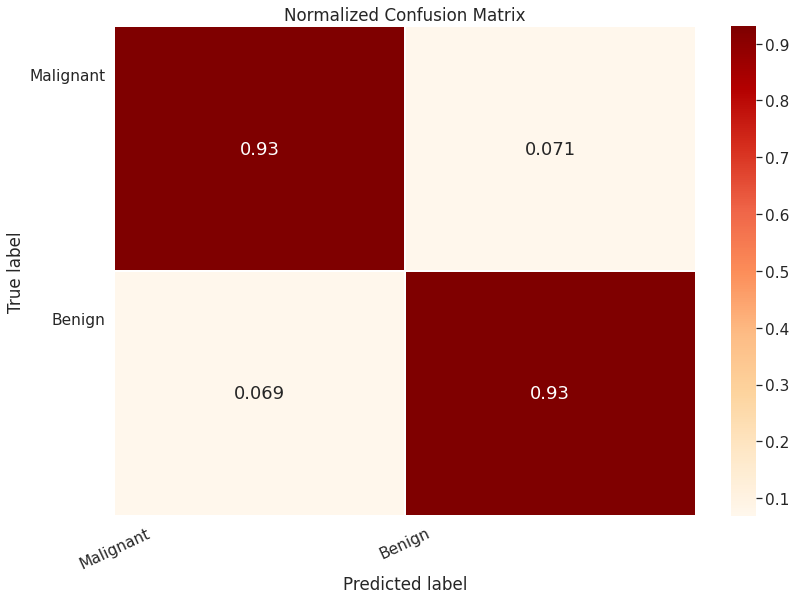

In [276]:
#1e(iii)
#Logistic regression classification with confusion matrix and same metrics as before
#Increased maximum iterations to allow for lbfgs algorithm convergence, l2 regularization to avoid overfitting, rest default hyperparameters are suitable
lgr = LogisticRegression(max_iter=4000, penalty='l2')
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

CM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

print("Accuracy: " + str(accuracy_score(y_pred,y_test)))
print("Precision score: " + str(precision_score(y_pred,y_test)))
print("Recall score: " + str(recall_score(y_pred,y_test)))
scores = cross_val_score(lgr, X, y, cv=10)
print("Cross-validation accuracy: " + str(scores.mean()))
print("Cross-validation standard deviation: " + str(scores.std()))

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy_score(y_pred ,y_test),precision_score(y_pred ,y_test),recall_score(y_pred ,y_test)]
ax.bar(metrics,scores)
plt.ylim([0.85,1.01])
plt.axhline(y=1,linewidth=1, color='r')
plt.xlabel('Score')
plt.ylabel('Performance metric')
plt.title('Performance Metrics')
plt.show()

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(13,9))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':18},
            cmap=plt.cm.OrRd, linewidths=0.2)

class_names = ['Malignant', 'Benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.2
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

Confusion matrix:
[[40  2]
 [ 5 67]]
Accuracy: 0.9385964912280702
Precision score: 0.9305555555555556
Recall score: 0.9710144927536232
Cross-validation accuracy: 0.9543233082706767
Cross-validation standard deviation: 0.019503131533736784


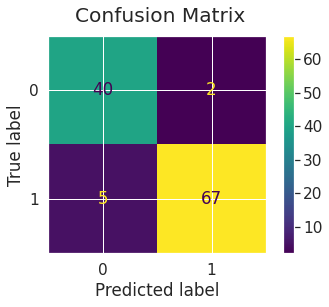

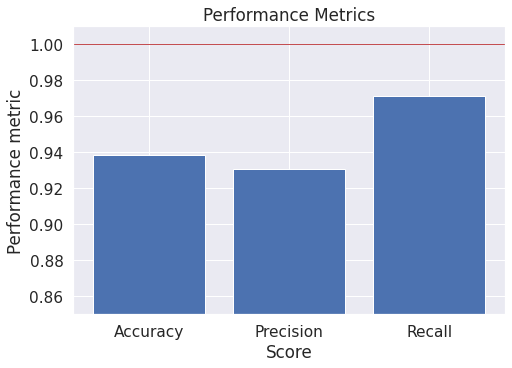

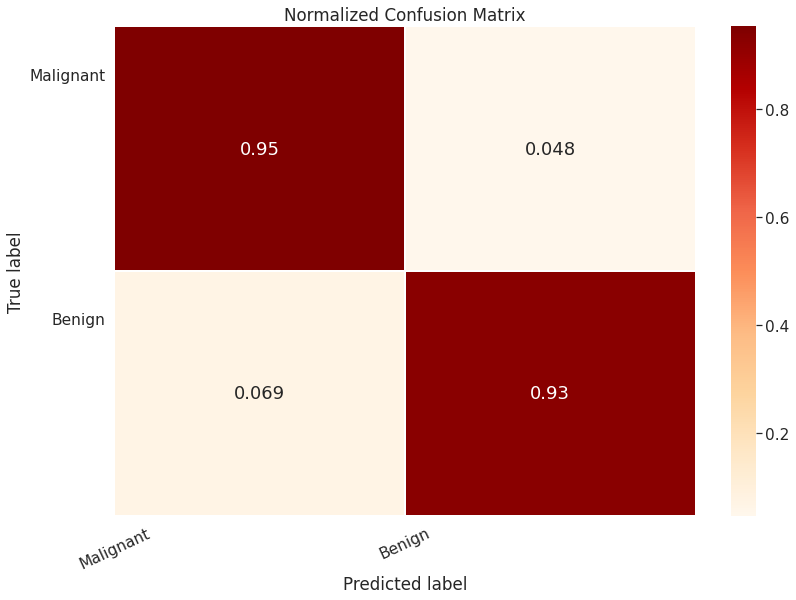

In [277]:
#1e(iv)
#Support vector machine classification with confusion matrix and same metrics as before
#Chose linear kernel because data don't appear to have any polynomial relationship
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

CM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

print("Accuracy: " + str(accuracy_score(y_pred,y_test)))
print("Precision score: " + str(precision_score(y_pred,y_test)))
print("Recall score: " + str(recall_score(y_pred,y_test)))
scores = cross_val_score(svc, X, y, cv=10)
print("Cross-validation accuracy: " + str(scores.mean()))
print("Cross-validation standard deviation: " + str(scores.std()))

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy_score(y_pred ,y_test),precision_score(y_pred ,y_test),recall_score(y_pred ,y_test)]
ax.bar(metrics,scores)
plt.ylim([0.85,1.01])
plt.axhline(y=1,linewidth=1, color='r')
plt.xlabel('Score')
plt.ylabel('Performance metric')
plt.title('Performance Metrics')
plt.show()

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(13,9))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':18},
            cmap=plt.cm.OrRd, linewidths=0.2)

class_names = ['Malignant', 'Benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.2
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

Confusion matrix:
[[38  4]
 [ 7 65]]
Accuracy: 0.9035087719298246
Precision score: 0.9027777777777778
Recall score: 0.9420289855072463
Cross-validation accuracy: 0.8893170426065163
Cross-validation standard deviation: 0.02594773725925241


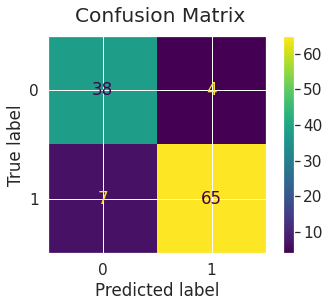

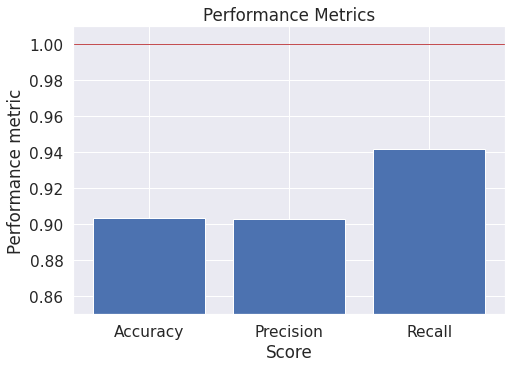

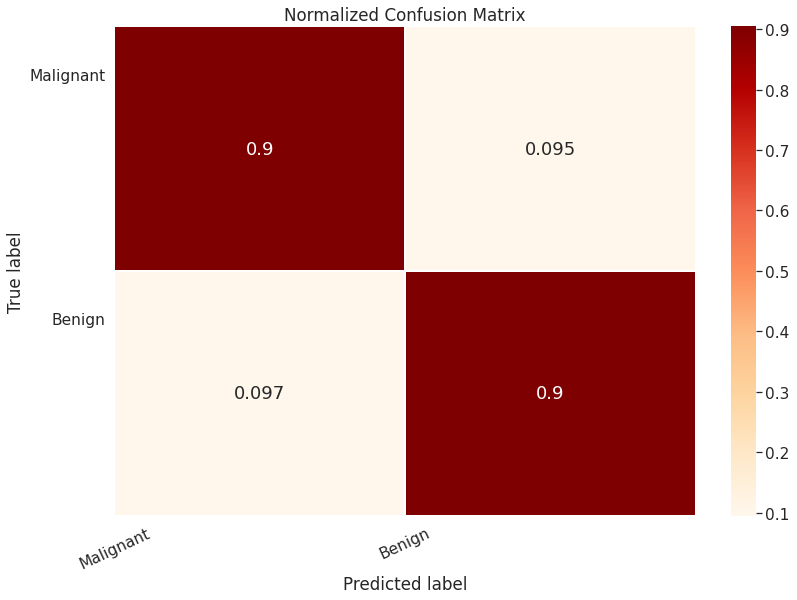

In [278]:
#1e(v)
#Decision tree classification with confusion matrix and same metrics as before
#Set a minimum impurity decrease to simplify tree and prevent overfitting, other default hyperparameters like max_depth, min_samples_leaf, etc. are suitable as default
dt = DecisionTreeClassifier(min_impurity_decrease=0.1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

CM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

print("Accuracy: " + str(accuracy_score(y_pred,y_test)))
print("Precision score: " + str(precision_score(y_pred,y_test)))
print("Recall score: " + str(recall_score(y_pred,y_test)))
scores = cross_val_score(dt, X, y, cv=10)
print("Cross-validation accuracy: " + str(scores.mean()))
print("Cross-validation standard deviation: " + str(scores.std()))

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy_score(y_pred ,y_test),precision_score(y_pred ,y_test),recall_score(y_pred ,y_test)]
ax.bar(metrics,scores)
plt.ylim([0.85,1.01])
plt.axhline(y=1,linewidth=1, color='r')
plt.xlabel('Score')
plt.ylabel('Performance metric')
plt.title('Performance Metrics')
plt.show()

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(13,9))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':18},
            cmap=plt.cm.OrRd, linewidths=0.2)

class_names = ['Malignant', 'Benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.2
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

Confusion matrix:
[[42  0]
 [ 1 71]]
Accuracy: 0.9912280701754386
Precision score: 0.9861111111111112
Recall score: 1.0
Cross-validation accuracy: 0.96312656641604
Cross-validation standard deviation: 0.032756317553392214


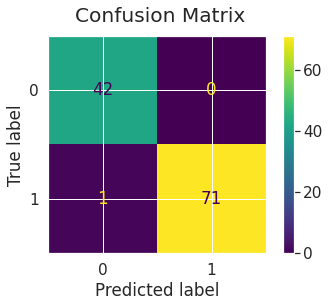

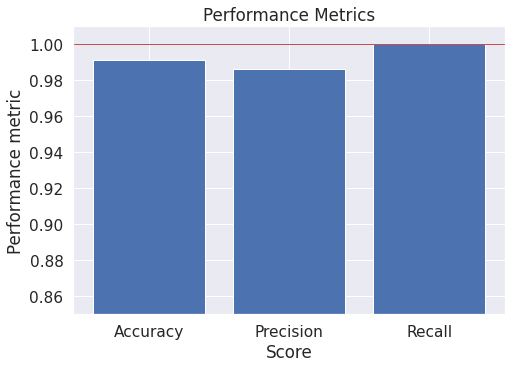

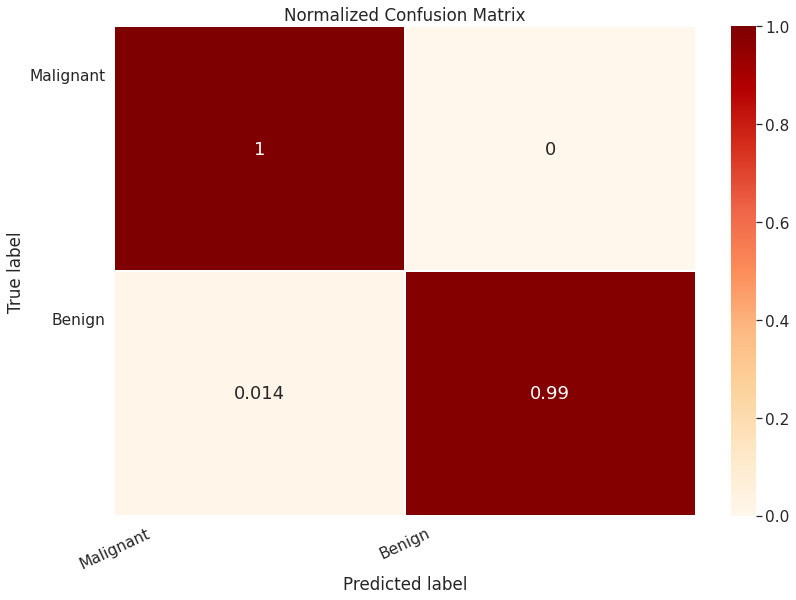

In [279]:
#1e(vi)
#Random forest classification with confusion matrix and same metrics as before
#The classifier performs better without a specified min_impurity_decrease or other changed hyperparameters, so best left as default
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

CM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

print("Accuracy: " + str(accuracy_score(y_pred,y_test)))
print("Precision score: " + str(precision_score(y_pred,y_test)))
print("Recall score: " + str(recall_score(y_pred,y_test)))
scores = cross_val_score(rf, X, y, cv=10)
print("Cross-validation accuracy: " + str(scores.mean()))
print("Cross-validation standard deviation: " + str(scores.std()))

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy_score(y_pred ,y_test),precision_score(y_pred ,y_test),recall_score(y_pred ,y_test)]
ax.bar(metrics,scores)
plt.ylim([0.85,1.01])
plt.axhline(y=1,linewidth=1, color='r')
plt.xlabel('Score')
plt.ylabel('Performance metric')
plt.title('Performance Metrics')
plt.show()

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(13,9))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':18},
            cmap=plt.cm.OrRd, linewidths=0.2)

class_names = ['Malignant', 'Benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.2
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [280]:
#1f
#Use my "goodness" metric, the average and stddev of cross-validation score, to measure each model performance on training data
scores = cross_val_score(ridge, X_train, y_train, cv=10)
print("Ridge regression cross-validation accuracy on training data: " + str(scores.mean()))
print("Ridge regression cross-validation standard deviation on training data: " + str(scores.std()))
scores = cross_val_score(knn, X_train, y_train, cv=10)
print("K-nearest neighbours cross-validation accuracy on training data: " + str(scores.mean()))
print("K-nearest neighbours cross-validation standard deviation on training data: " + str(scores.std()))
scores = cross_val_score(gnb, X_train, y_train, cv=10)
print("Naive bayes cross-validation accuracy on training data: " + str(scores.mean()))
print("Naive bayes cross-validation standard deviation on training data: " + str(scores.std()))
scores = cross_val_score(lgr, X_train, y_train, cv=10)
print("Logistic regression cross-validation accuracy on training data: " + str(scores.mean()))
print("Logistic regression cross-validation standard deviation on training data: " + str(scores.std()))
scores = cross_val_score(svc, X_train, y_train, cv=19)
print("Support vector machine cross-validation accuracy on training data: " + str(scores.mean()))
print("Support vector machine cross-validation standard deviation on training data: " + str(scores.std()))
scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Decision tree cross-validation accuracy on training data: " + str(scores.mean()))
print("Decision tree cross-validation standard deviation on training data: " + str(scores.std()))
scores = cross_val_score(rf, X_train, y_train, cv=10)
print("Random forest cross-validation accuracy on training data: " + str(scores.mean()))
print("Random forest cross-validation standard deviation on training data: " + str(scores.std()))

Ridge regression cross-validation accuracy on training data: 0.956231884057971
Ridge regression cross-validation standard deviation on training data: 0.03361791285171626
K-nearest neighbours cross-validation accuracy on training data: 0.9363285024154588
K-nearest neighbours cross-validation standard deviation on training data: 0.031614140763909546
Naive bayes cross-validation accuracy on training data: 0.9320289855072463
Naive bayes cross-validation standard deviation on training data: 0.026417701137129154
Logistic regression cross-validation accuracy on training data: 0.956135265700483
Logistic regression cross-validation standard deviation on training data: 0.021841733180204492
Support vector machine cross-validation accuracy on training data: 0.9517543859649122
Support vector machine cross-validation standard deviation on training data: 0.03643256080227227
Decision tree cross-validation accuracy on training data: 0.9057487922705315
Decision tree cross-validation standard deviation o

In [281]:
#1g
#Use my "goodness" metric, the average and stddev of cross-validation score, to measure each model performance on testing data
scores = cross_val_score(ridge, X_test, y_test, cv=10)
print("Ridge regression cross-validation accuracy on testing data: " + str(scores.mean()))
print("Ridge regression cross-validation standard deviation on testing data: " + str(scores.std()))
scores = cross_val_score(knn, X_test, y_test, cv=10)
print("K-nearest neighbours cross-validation accuracy on testing data: " + str(scores.mean()))
print("K-nearest neighbours cross-validation standard deviation on testing data: " + str(scores.std()))
scores = cross_val_score(gnb, X_test, y_test, cv=10)
print("Naive bayes cross-validation accuracy on testing data: " + str(scores.mean()))
print("Naive bayes cross-validation standard deviation on testing data: " + str(scores.std()))
scores = cross_val_score(lgr, X_test, y_test, cv=10)
print("Logistic regression cross-validation accuracy on testing data: " + str(scores.mean()))
print("Logistic regression cross-validation standard deviation on testing data: " + str(scores.std()))
scores = cross_val_score(svc, X_test, y_test, cv=10)
print("Support vector machine cross-validation accuracy on testing data: " + str(scores.mean()))
print("Support vector machine cross-validation standard deviation on testing data: " + str(scores.std()))
scores = cross_val_score(dt, X_test, y_test, cv=10)
print("Decision tree cross-validation accuracy on testing data: " + str(scores.mean()))
print("Decision tree cross-validation standard deviation on testing data: " + str(scores.std()))
scores = cross_val_score(rf, X_test, y_test, cv=10)
print("Random forest cross-validation accuracy on testing data: " + str(scores.mean()))
print("Random forest cross-validation standard deviation on testing data: " + str(scores.std()))

Ridge regression cross-validation accuracy on testing data: 0.9477272727272726
Ridge regression cross-validation standard deviation on testing data: 0.0427812360711985
K-nearest neighbours cross-validation accuracy on testing data: 0.9128787878787877
K-nearest neighbours cross-validation standard deviation on testing data: 0.05528227090653948
Naive bayes cross-validation accuracy on testing data: 0.9477272727272726
Naive bayes cross-validation standard deviation on testing data: 0.0427812360711985
Logistic regression cross-validation accuracy on testing data: 0.9318181818181819
Logistic regression cross-validation standard deviation on testing data: 0.08201435516802641
Support vector machine cross-validation accuracy on testing data: 0.9136363636363637
Support vector machine cross-validation standard deviation on testing data: 0.08498365855987973
Decision tree cross-validation accuracy on testing data: 0.8954545454545455
Decision tree cross-validation standard deviation on testing data

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


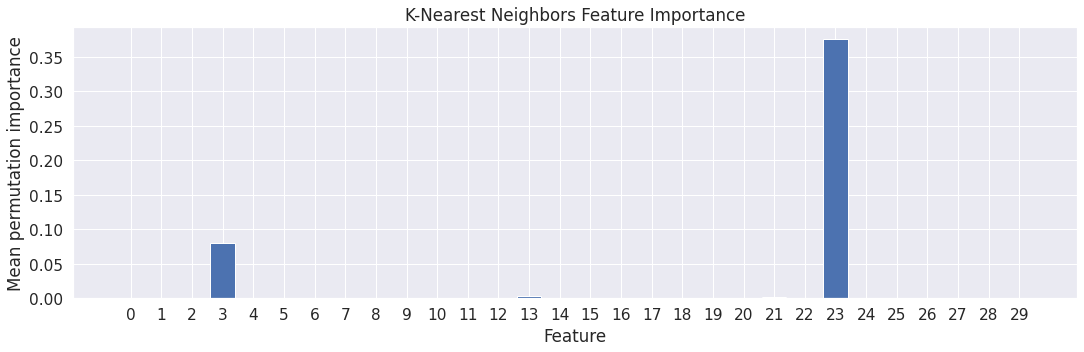

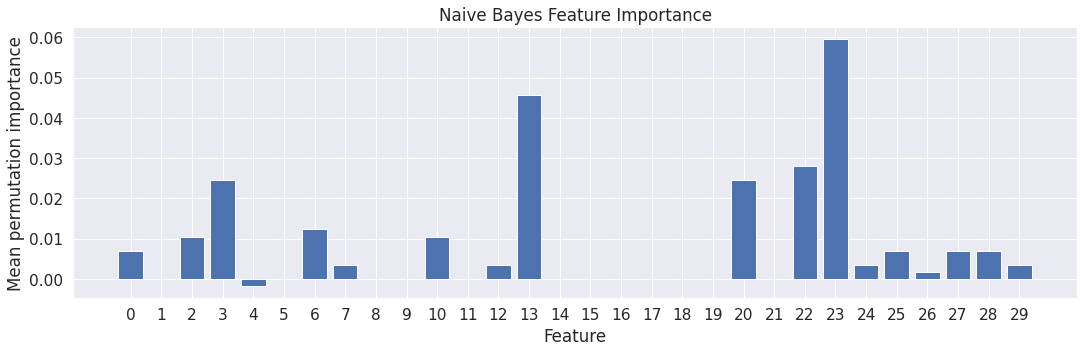

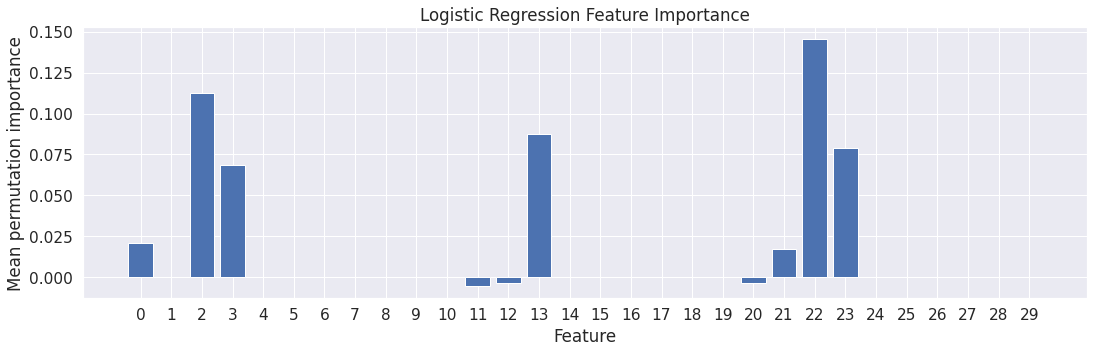

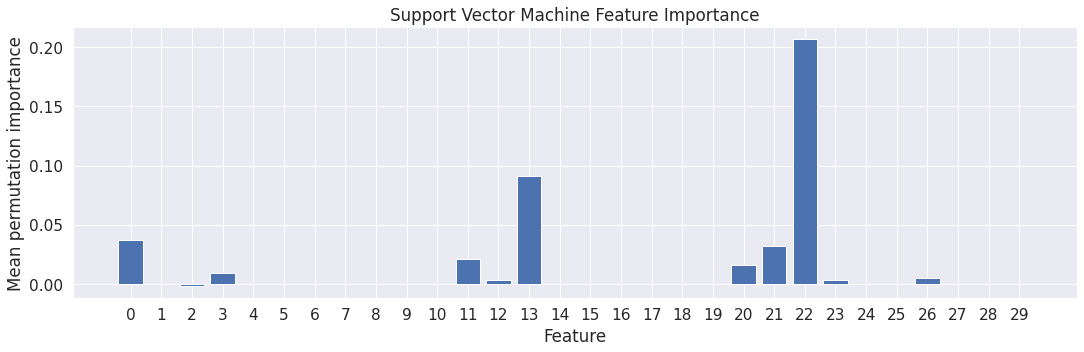

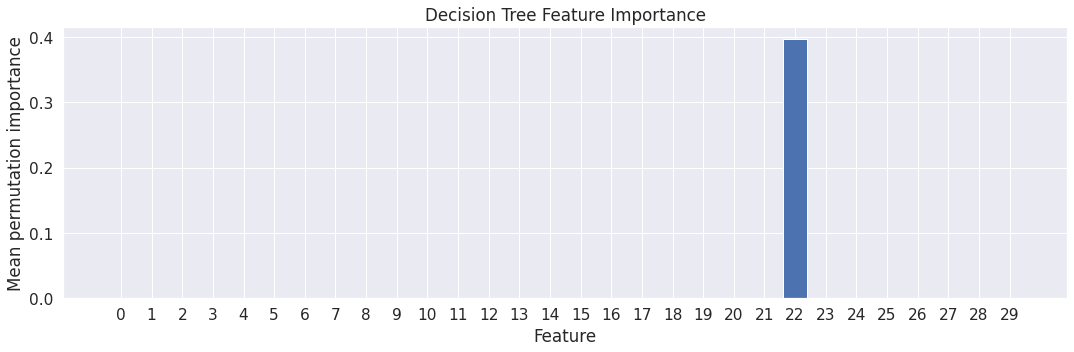

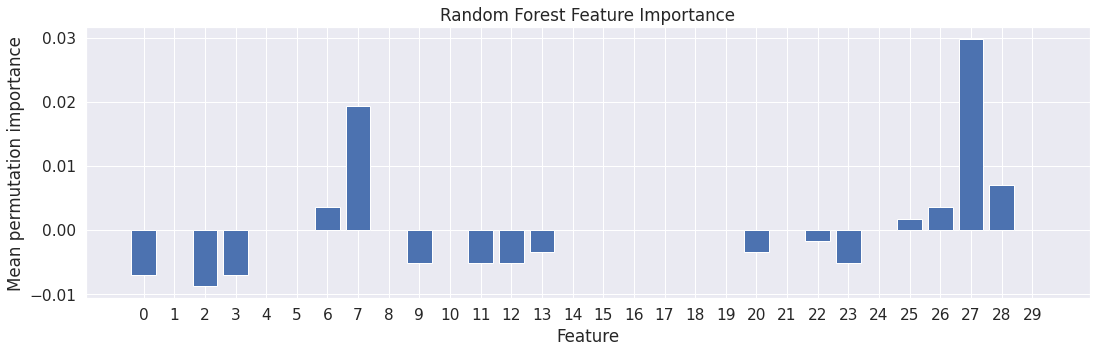

In [282]:
#2a
#Calculate and plot feature importances based on permutation importance
print(X.columns)

knn_imp = permutation_importance(knn, X_test, y_test)
f, ax = plt.subplots(figsize=(18,5))
plt.bar([x for x in range(len(knn_imp.importances_mean))], knn_imp.importances_mean)
plt.ylabel('Mean permutation importance')
plt.xlabel('Feature')
plt.title('K-Nearest Neighbors Feature Importance')
plt.xticks([item for item in range (len(X.columns))])
plt.show()

gnb_imp = permutation_importance(gnb, X_test, y_test)
f, ax = plt.subplots(figsize=(18,5))
plt.bar([x for x in range(len(gnb_imp.importances_mean))], gnb_imp.importances_mean)
plt.ylabel('Mean permutation importance')
plt.xlabel('Feature')
plt.title('Naive Bayes Feature Importance')
plt.xticks([item for item in range (len(X.columns))])
plt.show()

lgr_imp = permutation_importance(lgr, X_test, y_test)
f, ax = plt.subplots(figsize=(18,5))
plt.bar([x for x in range(len(lgr_imp.importances_mean))], lgr_imp.importances_mean)
plt.ylabel('Mean permutation importance')
plt.xlabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.xticks([item for item in range (len(X.columns))])
plt.show()

svc_imp = permutation_importance(svc, X_test, y_test)
f, ax = plt.subplots(figsize=(18,5))
plt.bar([x for x in range(len(svc_imp.importances_mean))], svc_imp.importances_mean)
plt.ylabel('Mean permutation importance')
plt.xlabel('Feature')
plt.title('Support Vector Machine Feature Importance')
plt.xticks([item for item in range (len(X.columns))])
plt.show()

dt_imp = permutation_importance(dt, X_test, y_test)
f, ax = plt.subplots(figsize=(18,5))
plt.bar([x for x in range(len(dt_imp.importances_mean))], dt_imp.importances_mean)
plt.ylabel('Mean permutation importance')
plt.xlabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.xticks([item for item in range (len(X.columns))])
plt.show()

rf_imp = permutation_importance(rf, X_test, y_test)
f, ax = plt.subplots(figsize=(18,5))
plt.bar([x for x in range(len(rf_imp.importances_mean))], rf_imp.importances_mean)
plt.ylabel('Mean permutation importance')
plt.xlabel('Feature')
plt.title('Random Forest Feature Importance')
plt.xticks([item for item in range (len(X.columns))])
plt.show()

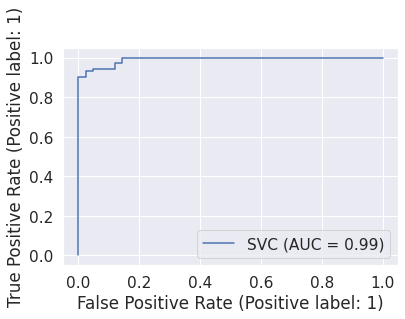

In [283]:
#3a, b
#Plot ROC curve for support vector machine model and calculate area under the curve
roc_svc = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

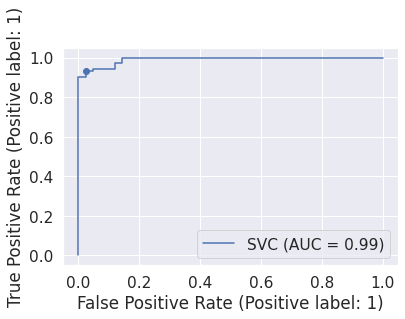

[0.023809523809523808, 0.9305555555555556] 0.6409461205854967


In [284]:
#3c
#Find index of maximum value of tpr-fpr and return threshold at that index
fpr, tpr, thresholds = roc_curve(np.array(y_test), svc.fit(X_train, y_train).decision_function(X_test))
roc_svc = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)])
plt.show()
print([fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)]], thresholds[np.argmax(tpr-fpr)])